In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from PIL import Image
print(tf.__version__)

2.4.1


In [2]:
#load data
path='./image_data/'
list_data=listdir(path)
image_set=[]

for filename in list_data:
    img=Image.open(path+filename)
    #img=img.convert(mode='L')
    image_set.append(np.asarray(img,dtype=int))
image_set=np.asarray(image_set)
image_set = image_set / 255.0

with open('label.txt') as r:
    labels=[int(line.rstrip('\n')) for line in r.readlines()]
    labels=np.asarray(labels)
train_images,test_images,train_labels,test_labels = train_test_split(image_set,labels,test_size=0.3, shuffle=True, random_state=999)
class_names=['false','true']


In [3]:
print(train_images.shape,test_images.shape,train_labels.shape,test_labels.shape)

(2100, 256, 256, 3) (900, 256, 256, 3) (2100,) (900,)


In [15]:
#model
model = keras.Sequential([
    keras.layers.Conv2D(16,(4,4),activation='relu',padding='valid',input_shape=(256,256,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
hist=model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
66/66 [==============================] - 43s 632ms/step - loss: 3.4782 - accuracy: 0.5105
Epoch 2/5
66/66 [==============================] - 43s 644ms/step - loss: 0.5717 - accuracy: 0.8085
Epoch 3/5
66/66 [==============================] - 46s 698ms/step - loss: 0.1894 - accuracy: 0.9487
Epoch 4/5
66/66 [==============================] - 44s 672ms/step - loss: 0.0662 - accuracy: 0.9901
Epoch 5/5
66/66 [==============================] - 38s 582ms/step - loss: 0.0202 - accuracy: 0.9962


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 253, 253, 16)      784       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 16)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 254016)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                8128544   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 8,129,394
Trainable params: 8,129,394
Non-trainable params: 0
_________________________________________________________________


In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

29/29 - 4s - loss: 0.1321 - accuracy: 0.9544

테스트 정확도: 0.9544444680213928


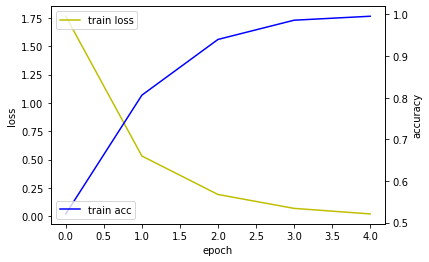

In [20]:
#history
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()


In [21]:
#make prediction
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

0

In [22]:
#plotting function
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

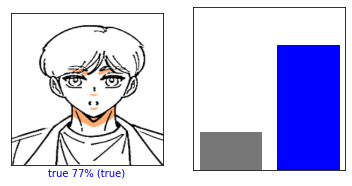

In [31]:
i = 621
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

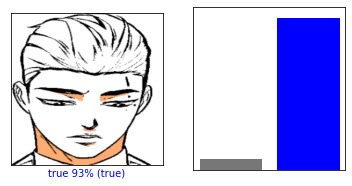

In [29]:
i = 273
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()